<a href="https://colab.research.google.com/github/rohithmallula19/Amazon-Stock-Prediction-/blob/main/AutoML_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 21 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_g524kc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#from google.colab import files
#data= files.upload()
data= h2o.import_file('heart.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.head()

age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trtbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalachh': 'int',
 'exng': 'int',
 'oldpeak': 'real',
 'slp': 'int',
 'caa': 'int',
 'thall': 'int',
 'output': 'int'}

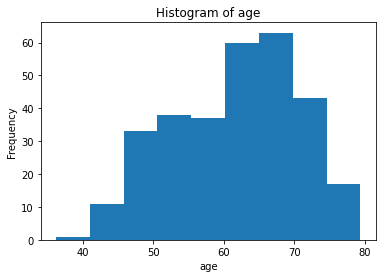

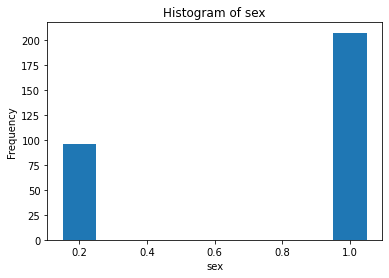

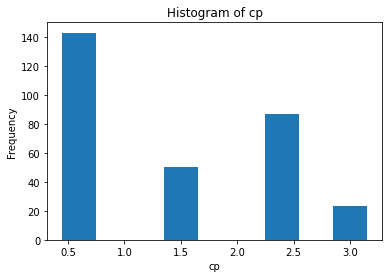

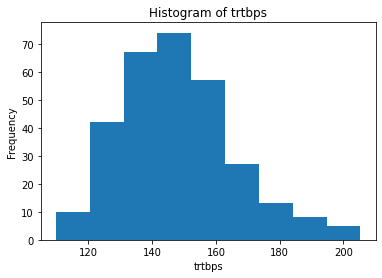

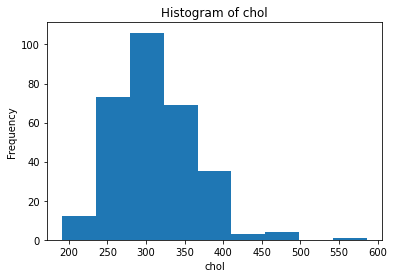

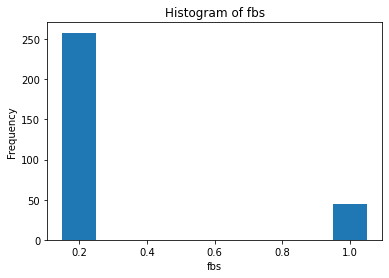

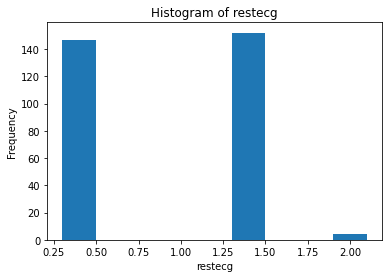

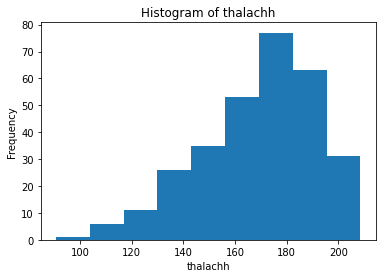

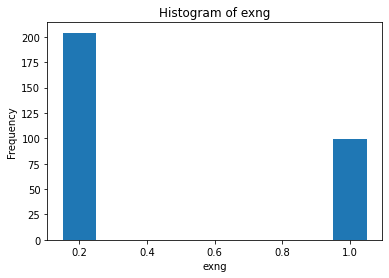

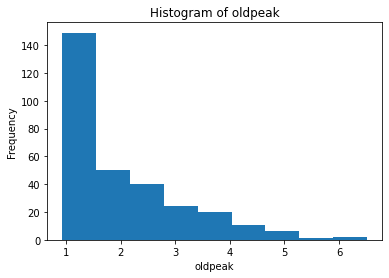

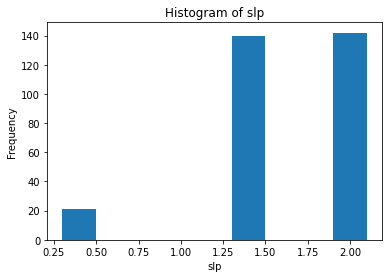

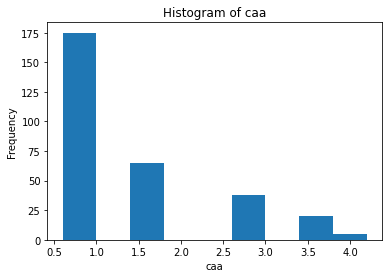

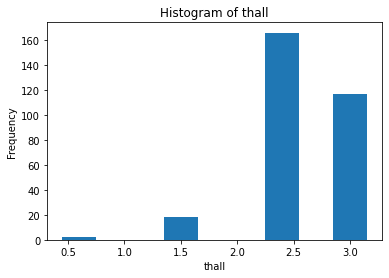

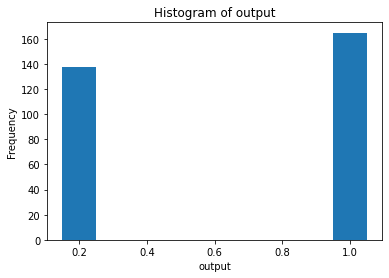

In [ ]:
for col in data.columns:
  data[col].hist()

In [ ]:
train,test= data.split_frame(ratios=[.8])

In [ ]:
print(len(train),len(test))

246 57


In [ ]:
response = "output"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [ ]:
predictor= data.columns

In [ ]:
predictor.remove("output")

In [ ]:
predictor

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [ ]:
aml= H2OAutoML(max_runtime_secs=180,verbosity="info")
aml.train(predictor,response,train)

AutoML progress: |
01:12:23.830: Project: AutoML_1_20230301_11223
01:12:23.832: 5-fold cross-validation will be used.
01:12:23.841: Setting stopping tolerance adaptively based on the training frame: 0.05
01:12:23.841: Build control seed: -1 (random)
01:12:23.842: training frame: Frame key: AutoML_1_20230301_11223_training_py_177_sid_b0d9    cols: 14    rows: 246  chunks: 1    size: 4318  checksum: -7572809328406597716
01:12:23.842: validation frame: NULL
01:12:23.842: leaderboard frame: NULL
01:12:23.842: blending frame: NULL
01:12:23.842: response column: output
01:12:23.842: fold column: null
01:12:23.842: weights column: null
01:12:23.903: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230301_11223_model_9


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 53                          5490                   2            3            2.24528       3             5             3.56604

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09162182950831588
RMSE: 0.3026909802229262
LogLoss: 0.30948167892174977
Mean Per-Class Error: 0.11231231231231231
AUC: 0.9511511511511512
AUCPR: 0.9580749543434867
Gini: 0.9023023023023025

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46374614754000826
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      91   20   0.1802   (20.0/111.0)
1      6    129  0.0444   (6.0/135.0)
Total  97   149  0.1057   (26.0/246.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.463746     0.908451  145
max f2                       0.334413     0.940171  158
max f0point5                 0.728741     0.907441  100
max accuracy                 0.463746     0.894309  145
max precision                0.979421     1         0
max recall                   0.0745035    1         214
max specificity              0.979421     1         0
max absolute_mcc             0.463746     0.789517  145
max min_per_class_accuracy   0.538089     0.882883  129
max mean_per_class_accuracy  0.530063     0.888789  132
max tns                      0.979421     111       0
max fns                      0.979421     134       0
max fps                      0.021389     111       241
max tps                      0.0745035    135       214
max tnr                      0.979421     1         0
max fnr                      0.979421     0.992593  0
max fpr                      0.021389     1         241
max tpr                      0.0745035    1         214

Gains/Lift Table: Avg response rate: 54.88 %, avg score: 54.45 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0162602                   0.975402           1.82222    1.82222            1                0.976459   1                           0.976459            0.0296296       0.0296296                  82.2222   82.2222            0.0296296
2        0.0203252                   0.969638           1.82222    1.82222            1                0.969716   1                           0.97511             0.00740741      0.037037                   82.2222   82.2222            0.037037
3        0.0325203                   0.964668           1.82222    1.82222            1                0.967636   1                           0.972307            0.0222222       0.0592593                  82.2222   82.2222            0.0592593
4        0.0406504                   0.962473           1.82222    1.82222            1                0.962648   1                           0.970376            0.0148148       0.0740741                  82.2222   82.2222            0.0740741
5        0.0528455                   0.961948           1.82222    1.82222            1                0.962223   1                           0.9

In [ ]:
lb=aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_1_20230301_11223_model_9,0.910878,0.383097,0.927124,0.178779,0.348411,0.12139
GBM_grid_1_AutoML_1_20230301_11223_model_14,0.909443,0.379037,0.918985,0.184384,0.346969,0.120388
GBM_grid_1_AutoML_1_20230301_11223_model_15,0.905973,0.393247,0.918435,0.188088,0.352165,0.12402
GBM_grid_1_AutoML_1_20230301_11223_model_10,0.905973,0.394624,0.916401,0.176677,0.352069,0.123952
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_11223,0.904037,0.389514,0.920965,0.187788,0.353138,0.124706
XGBoost_2_AutoML_1_20230301_11223,0.903303,0.387208,0.917104,0.193393,0.353067,0.124656
GBM_grid_1_AutoML_1_20230301_11223_model_13,0.902302,0.395559,0.918773,0.206106,0.356549,0.127127
XGBoost_grid_1_AutoML_1_20230301_11223_model_5,0.900834,0.396093,0.912819,0.184384,0.354225,0.125475
GBM_grid_1_AutoML_1_20230301_11223_model_6,0.9001,0.39331,0.913742,0.197097,0.355874,0.126646
XGBoost_grid_1_AutoML_1_20230301_11223_model_10,0.899766,0.393925,0.91474,0.206907,0.358123,0.128252


The models here are listed based on the AUC metric. Although there are multiple sort metrics to sort and score each models, we are sticking to the default one here. That is AUC for a binary classification problem and mean_per_class_error for multinomial classification. In our case it is a binary classification problem. 

Observation from the leaderboard:

1.   GBM_grid_1_AutoML_1_20230217_05321_model_12 is the best performing model with an AUC of 0.923
2.   While the second and third are almost similarly succesful in classifying with an AUC of  0.921

Note: Since this a binary classification problem we are checking our **AUC** but in any other case of a multinominal classification problem we would consider the ***MPCE***



In [ ]:
import pandas as pd
dfpd = pd.read_csv("heart.csv")

In [ ]:
dfpd.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
dfpd.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trtbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalachh,42.742178
8,exng,2.022527
9,oldpeak,3.062890


VIF for age , trtbps, thalachh, chol is greater than 10, indicates that there is an existence of multicollinearity in the data

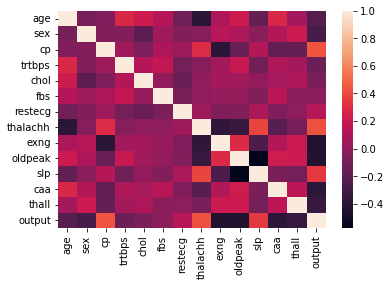

In [ ]:
cor = sns.heatmap(dfpd.corr())

[thlachh, age], [exng, cp], [oldpeak,slp]

In [ ]:
mdl_idx=0
gbm_idx=0
#glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = gbm_idx
    if "GBM" not in m:
        break
    gbm_idx = gbm_idx + 1

for m in aml_leaderboard_df["model_id"]:
    if "StackedEnsemble" in m:
        models_dict[m] = mdl_idx
        break
    mdl_idx = mdl_idx + 1
models_dict


{'GBM_grid_1_AutoML_1_20230301_11223_model_9': 0,
 'GBM_grid_1_AutoML_1_20230301_11223_model_14': 1,
 'GBM_grid_1_AutoML_1_20230301_11223_model_15': 2,
 'GBM_grid_1_AutoML_1_20230301_11223_model_10': 3,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_11223': 4}

In [ ]:
print(mdl_idx)
best_model= h2o.get_model(aml.leaderboard[mdl_idx,"model_id"])

4


In [ ]:
best_model.algo

'stackedensemble'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
if best_model.algo in ["gbm","drf","xrt","xgboost","stackedensemble"]:
  best_model.varimp_plot()

H2OValueError: ignored

So the variable importance plot is not available for Stacked Ensembles. We should examine our next best models that are not StackedEnsembles

In [ ]:
aml.leaderboard[:5,"model_id"]

model_id
GBM_grid_1_AutoML_1_20230301_11223_model_9
GBM_grid_1_AutoML_1_20230301_11223_model_14
GBM_grid_1_AutoML_1_20230301_11223_model_15
GBM_grid_1_AutoML_1_20230301_11223_model_10
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_11223


In [ ]:
m = h2o.get_model(lb[0,"model_id"])

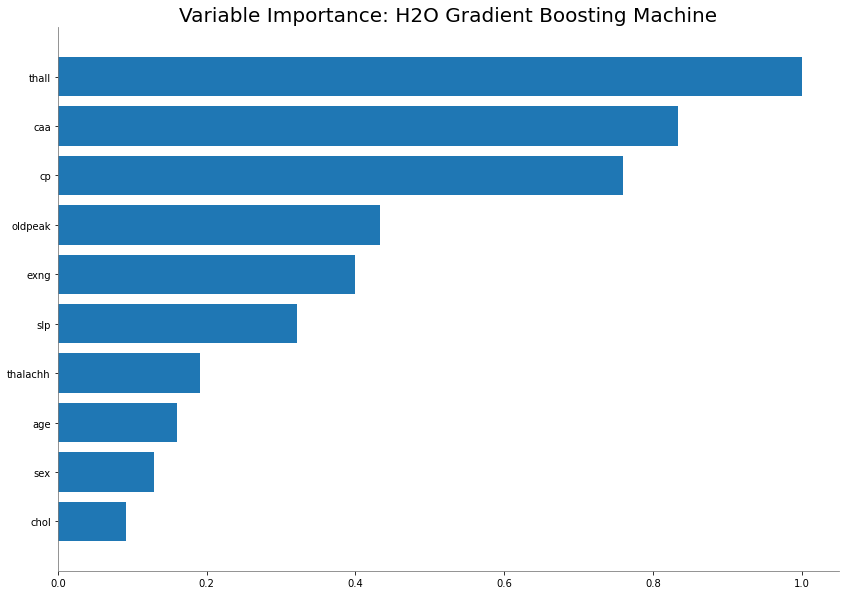

<Figure size 432x288 with 0 Axes>

In [ ]:
m.varimp_plot()

The above Variable Importance Graph  is based on H2o's Gradient Boosting Machine. 
Key Takeaways:


1.   "cp" Chest pain type is the most important variable of all.
2.   "caa" is very close to "cp" with an importance of 0.85



In [ ]:
if gbm_idx is not 0:
    print(mdl_idx)
    sem_model = h2o.get_model(aml.leaderboard[mdl_idx, "model_id"])
    print(sem_model.algo)
    sem_model.std_coef_plot()

4
stackedensemble


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-37-0b6ae3cb3a5f>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gbm_idx is not 0:


H2OValueError: ignored

In [ ]:
print(best_model.auc(train=True))

0.9512178845512178


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.10478948050059976,
 'rmse': 0.32371203329595233,
 'null_degrees_of_freedom': 56,
 'residual_degrees_of_freedom': 53,
 'residual_deviance': 38.14632837772255,
 'null_deviance': 78.97667751911763,
 'aic': 46.14632837772255,
 'logloss': 0.33461691559405754,
 'auc': 0.9370370370370371,
 'gini': 0.8740740740740742}

In [ ]:
predictions = best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

    predict        p0        p1
0         1  0.321419  0.678581
1         1  0.050770  0.949230
2         1  0.089219  0.910781
3         1  0.050645  0.949355
4         0  0.780701  0.219299
5         1  0.207222  0.792778
6         1  0.515255  0.484745
7         1  0.028203  0.971797
8         1  0.241676  0.758324
9         1  0.141077  0.858923
10        1  0.114657  0.885343
11        1  0.230106  0.769894
12        1  0.019365  0.980635
13        1  0.078905  0.921095
14        1  0.454276  0.545724
15        1  0.525899  0.474101
16        1  0.454212  0.545788
17        0  0.858164  0.141836
18        0  0.881852  0.118148
19        1  0.126781  0.873219
20        1  0.268664  0.731336
21        1  0.464789  0.535211
22        1  0.107367  0.892633
23        1  0.016382  0.983618
24        1  0.018324  0.981676
25        1  0.479399  0.520601
26        1  0.128798  0.871202
27        1  0.320370  0.679630
28        1  0.031010  0.968990
29        1  0.018219  0.981781
30      

In [ ]:
y_test= h2o.as_list(test[response])
y_test

,output
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
print(predictor)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [ ]:
##Regularisation

from h2o.estimators.gbm import H2OGradientBoostingEstimator
# Elastic Net Regularization
heart_gbm = H2OGradientBoostingEstimator(family="auto", lambda_=0, compute_p_values=True, nfolds=5)
# RIDGE Regularization
heart_gbm_regularization_ridge = H2OGradientBoostingEstimator(family="auto", alpha=0, nfolds=5)
 # LASSO Regularization



TypeError: ignored

Now the error seems pretty straightforward. Regularization is the process of adding penalty to the loss function to avoid and counter overfittting. We try to apply different types of regularisation to see the effects. Unlike coefficients, we have to solve for the leaf values. So *alpha* is not a parameter of GradientBoostingEstimator nor is *family* 
So we use GLM model to check if regularization is useful to make the model perform better.

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator
heart_glm = H2OGeneralizedLinearEstimator(family="auto",lambda_=0, compute_p_values=True, nfolds=10)
# RIDGE Regularization
heart_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family="auto", alpha=0, nfolds=10)
 # LASSO Regularization
heart_gm_regularization_lasso = H2OGeneralizedLinearEstimator(family="auto", alpha=1, nfolds=10) 
# Lambda Search
heart_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(lambda_search=True)

We are creating two different GLM models using different regularization tokens: Ridge and Lasso



1.   *heart_glm_regularization_ridge* is a ridge regression instance as obvious from the name. we set the number of cross-validation folds to 10 and alpha=0 representing the L1 penalty 
2.   *heart_glm_regularization_lasso* is a lasso regression instance. we set the same number of cv folds i.e. 10 folds and alpha set to 1 representing L2 penalty. 






In [ ]:
heart_glm.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677633040773_6474


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              13                            13                             6                       py_177_sid_b0d9

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10891616697640111
RMSE: 0.33002449450972743
LogLoss: 0.3512168756290298
AUC: 0.9223223223223224
AUCPR: 0.9310711294518076
Gini: 0.8446446446446447
Null degrees of freedom: 245
Residual degrees of freedom: 232
Null deviance: 338.68322080900685
Residual deviance: 172.79870280948268
AIC: 200.79870280948268

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5664936189400562
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      92   19   0.1712   (19.0/111.0)
1      13   122  0.0963   (13.0/135.0)
Total  105  141  0.1301   (32.0/246.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.566494     0.884058  139
max f2                       0.303347     0.921986  163
max f0point5                 0.645023     0.874016  123
max accuracy                 0.566494     0.869919  139
max precision                0.997807     1         0
max recall                   0.0311357    1         207
max specificity              0.997807     1         0
max absolute_mcc             0.566494     0.736972  139
max min_per_class_accuracy   0.620923     0.846847  130
max mean_per_class_accuracy  0.566494     0.866266  139
max tns                      0.997807     111       0
max fns                      0.997807     134       0
max fps                      0.00164912   111       244
max tps                      0.0311357    135       207
max tnr                      0.997807     1         0
max fnr                      0.997807     0.992593  0
max fpr                      0.00164912   1         244
max tpr                      0.0311357    1         207

Gains/Lift Table: Avg response rate: 54.88 %, avg score: 76.24 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0121951                   1.2565             0         0                  0                1.47194   0                           1.47194             0               0                          -100      -100               -0.027027
2        0.0203252                   1.20703            0.911111  0.364444           0.5              1.22036   0.2                         1.37131             0.00740741      0.00740741                 -8.88889  -63.5556           -0.0286286
3        0.0325203                   1.16659            0         0.227778           0                1.19337   0.125                       1.30458             0               0.00740741                 -100      -77.2222           -0.0556557
4        0.0406504                   1.12347            0         0.182222           0                1.14136   0.1                         1.27194             0               0.00740741                 -100      -81.7778           -0.0736737
5        0.0528455                   1.08044            1.21481   0.4205

## Ridge Regression

In [ ]:
heart_glm_regularization_ridge.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677633040773_6507


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.24E-4 )  13                            13                             5                       py_177_sid_b0d9

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10893871515994481
RMSE: 0.33005865412066504
LogLoss: 0.3512185011817197
AUC: 0.9222555889222556
AUCPR: 0.9310301412524338
Gini: 0.8445111778445111
Null degrees of freedom: 245
Residual degrees of freedom: 232
Null deviance: 338.68322080900685
Residual deviance: 172.79950258140607
AIC: 200.79950258140607

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.566525115304033
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      92   19   0.1712   (19.0/111.0)
1      13   122  0.0963   (13.0/135.0)
Total  105  141  0.1301   (32.0/246.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.566525     0.884058  139
max f2                       0.304327     0.921986  163
max f0point5                 0.645088     0.874016  123
max accuracy                 0.566525     0.869919  139
max precision                0.997757     1         0
max recall                   0.031487     1         207
max specificity              0.997757     1         0
max absolute_mcc             0.566525     0.736972  139
max min_per_class_accuracy   0.621315     0.846847  130
max mean_per_class_accuracy  0.566525     0.866266  139
max tns                      0.997757     111       0
max fns                      0.997757     134       0
max fps                      0.00169009   111       244
max tps                      0.031487     135       207
max tnr                      0.997757     1         0
max fnr                      0.997757     0.992593  0
max fpr                      0.00169009   1         244
max tpr                      0.031487     1         207

Gains/Lift Table: Avg response rate: 54.88 %, avg score: 54.88 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0121951                   0.99503            1.82222   1.82222            1                0.996447    1                           0.996447            0.0222222       0.0222222                  82.2222   82.2222            0.0222222
2        0.0203252                   0.992436           1.82222   1.82222            1                0.993642    1                           0.995325            0.0148148       0.037037                   82.2222   82.2222            0.037037
3        0.0325203                   0.991675           1.82222   1.82222            1                0.992166    1                           0.99414             0.0222222       0.0592593                  82.2222   82.2222            0.0592593
4        0.0406504                   0.990121           1.82222   1.82222            1                0.99127     1                           0.993566            0.0148148       0.0740741                  82.2222   82.2222            0.0740741
5        0.0528455                 

# **Lasso Regression**

In [ ]:
heart_gm_regularization_lasso.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677633040773_6540


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 2.24E-4 )  13                            13                             5                       py_177_sid_b0d9

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10894332568376362
RMSE: 0.33006563844751186
LogLoss: 0.3512216947781326
AUC: 0.9221888555221889
AUCPR: 0.9308468848785666
Gini: 0.8443777110443778
Null degrees of freedom: 245
Residual degrees of freedom: 232
Null deviance: 338.68322080900685
Residual deviance: 172.80107383084118
AIC: 200.80107383084118

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.567405792992023
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      92   19   0.1712   (19.0/111.0)
1      13   122  0.0963   (13.0/135.0)
Total  105  141  0.1301   (32.0/246.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.567406     0.884058  139
max f2                       0.304865     0.921986  163
max f0point5                 0.644601     0.874016  123
max accuracy                 0.567406     0.869919  139
max precision                0.997714     1         0
max recall                   0.0318146    1         207
max specificity              0.997714     1         0
max absolute_mcc             0.567406     0.736972  139
max min_per_class_accuracy   0.621065     0.846847  130
max mean_per_class_accuracy  0.567406     0.866266  139
max tns                      0.997714     111       0
max fns                      0.997714     134       0
max fps                      0.00170403   111       244
max tps                      0.0318146    135       207
max tnr                      0.997714     1         0
max fnr                      0.997714     0.992593  0
max fpr                      0.00170403   1         244
max tpr                      0.0318146    1         207

Gains/Lift Table: Avg response rate: 54.88 %, avg score: 54.88 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0121951                   0.994991           1.82222   1.82222            1                0.996401    1                           0.996401            0.0222222       0.0222222                  82.2222   82.2222            0.0222222
2        0.0203252                   0.992384           1.82222   1.82222            1                0.993564    1                           0.995266            0.0148148       0.037037                   82.2222   82.2222            0.037037
3        0.0325203                   0.991554           1.82222   1.82222            1                0.992098    1                           0.994078            0.0222222       0.0592593                  82.2222   82.2222            0.0592593
4        0.0406504                   0.990025           1.82222   1.82222            1                0.991134    1                           0.993489            0.0148148       0.0740741                  82.2222   82.2222            0.0740741
5        0.0528455                   0

Takeaways:

1.   Looking into the Cross Validation summary for all three models, Lasso is giving better AUC, accuracy and least err when compared to the non regularized and ridge regularized models. 
2.   Ridge and Nonregularized GLM model have a reduced AUC and also higher MSE, RMSE when compared to Lasso. 
3. Lasso Regularization did a better job on the cross validation data and significantly avoided overfitting of the model




In [ ]:
heart_glm_regularization_lambda_search.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677633040773_6573


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001276 )  nlambda = 100, lambda.max = 0.4479, lambda.min = 0.001276, lambda.1se = -1.0  13                            13                             102                     py_177_sid_b0d9

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10906637620126196
RMSE: 0.33025198894368823
LogLoss: 0.3513024049185615
AUC: 0.9222555889222556
AUCPR: 0.930828985556672
Gini: 0.8445111778445111
Null degrees of freedom: 245
Residual degrees of freedom: 232
Null deviance: 338.68322080900685
Residual deviance: 172.8407832199323
AIC: 200.8407832199323

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.569116828097954
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      92   19   0.1712   (19.0/111.0)
1      13   122  0.0963   (13.0/135.0)
Total  105  141  0.1301   (32.0/246.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.569117     0.884058  139
max f2                       0.310352     0.921986  163
max f0point5                 0.569117     0.872675  139
max accuracy                 0.569117     0.869919  139
max precision                0.997391     1         0
max recall                   0.0340013    1         207
max specificity              0.997391     1         0
max absolute_mcc             0.569117     0.736972  139
max min_per_class_accuracy   0.621919     0.846847  130
max mean_per_class_accuracy  0.569117     0.866266  139
max tns                      0.997391     111       0
max fns                      0.997391     134       0
max fps                      0.00193595   111       244
max tps                      0.0340013    135       207
max tnr                      0.997391     1         0
max fnr                      0.997391     0.992593  0
max fpr                      0.00193595   1         244
max tpr                      0.0340013    1         207

Gains/Lift Table: Avg response rate: 54.88 %, avg score: 54.88 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0121951                   0.994475           1.82222   1.82222            1                0.995979    1                           0.995979            0.0222222       0.0222222                  82.2222   82.2222            0.0222222
2        0.0203252                   0.991692           1.82222   1.82222            1                0.992851    1                           0.994728            0.0148148       0.037037                   82.2222   82.2222            0.037037
3        0.0325203                   0.990694           1.82222   1.82222            1                0.991362    1                           0.993466            0.0222222       0.0592593                  82.2222   82.2222            0

In [ ]:
coeff_tab= heart_glm._model_json["output"]["coefficients_table"]

In [ ]:
coeff_tab.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.921708,2.864656,1.019916,0.307768,0.129538
1,age,-0.012752,0.025251,-0.505017,0.613547,-0.117006
2,sex,-1.716578,0.504705,-3.401151,0.000671,-0.808346
3,cp,0.950334,0.219142,4.336605,0.000014,0.967601
4,trtbps,-0.014030,0.012394,-1.131996,0.257636,-0.237662
5,chol,-0.003470,0.003945,-0.879671,0.379038,-0.185582
6,fbs,0.027588,0.579090,0.047641,0.962003,0.010097
7,restecg,0.636584,0.389068,1.636179,0.101802,0.328894
8,thalachh,0.021991,0.011438,1.922529,0.054539,0.511168
9,exng,-0.739351,0.463461,-1.595282,0.110649,-0.347056


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230301_11223_model_10,0.954321,0.313478,0.95586,0.0888889,0.313897,0.0985314,533,0.089344,XGBoost
XGBoost_grid_1_AutoML_1_20230301_11223_model_13,0.951852,0.309632,0.962531,0.124074,0.307816,0.0947508,131,0.113101,XGBoost
XGBoost_3_AutoML_1_20230301_11223,0.950617,0.304971,0.960932,0.105556,0.30083,0.0904985,2238,0.077364,XGBoost
GBM_grid_1_AutoML_1_20230301_11223_model_15,0.945679,0.341515,0.947369,0.087037,0.320276,0.102577,88,0.075485,GBM
GBM_grid_1_AutoML_1_20230301_11223_model_1,0.944444,0.341912,0.950478,0.0685185,0.321055,0.103076,139,0.066119,GBM
XGBoost_grid_1_AutoML_1_20230301_11223_model_19,0.94321,0.330896,0.941502,0.105556,0.320901,0.102977,125,0.068145,XGBoost
XGBoost_grid_1_AutoML_1_20230301_11223_model_2,0.94321,0.318293,0.955984,0.124074,0.312745,0.0978097,321,0.063354,XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20230301_11223,0.941975,0.335365,0.947151,0.103704,0.324397,0.105233,766,0.146083,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_11223,0.941975,0.335365,0.947151,0.103704,0.324397,0.105233,655,0.241813,StackedEnsemble
GBM_grid_1_AutoML_1_20230301_11223_model_18,0.939506,0.345058,0.952234,0.125926,0.325767,0.106124,88,0.080272,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20230301_11223_model_9

,0,1,Error,Rate
0,24.0,3.0,0.1111,(3.0/27.0)
1,2.0,28.0,0.0667,(2.0/30.0)
Total,26.0,31.0,0.0877,(5.0/57.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

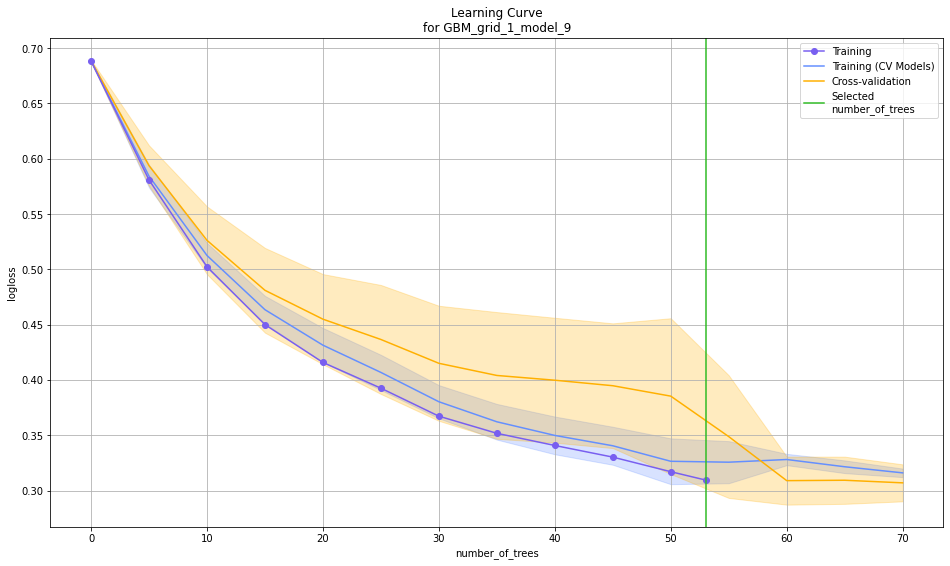

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

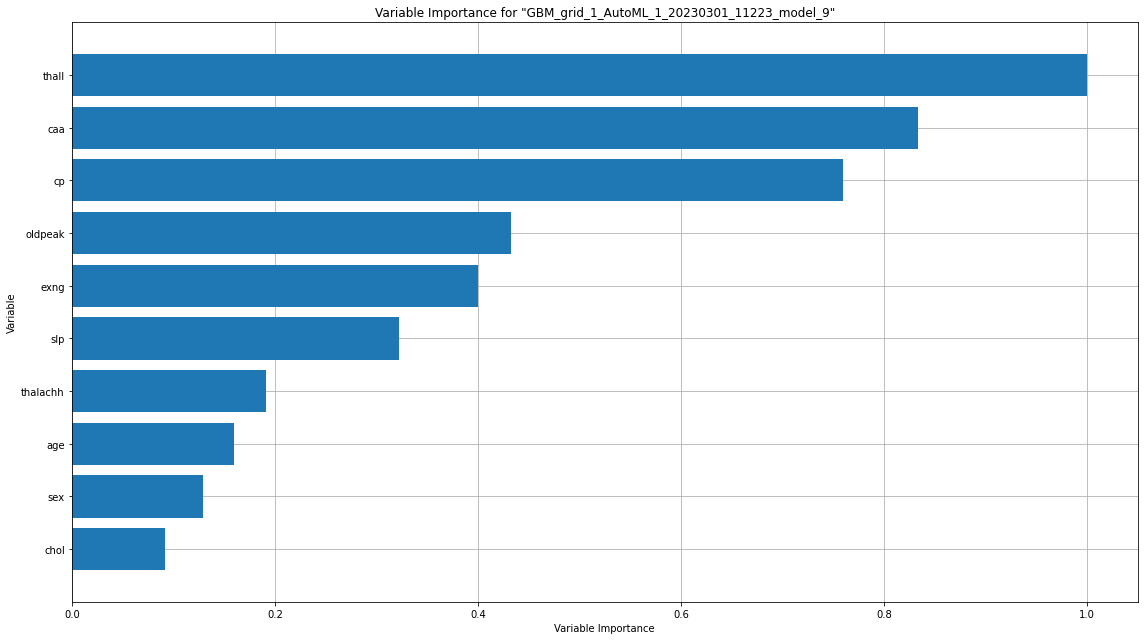

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

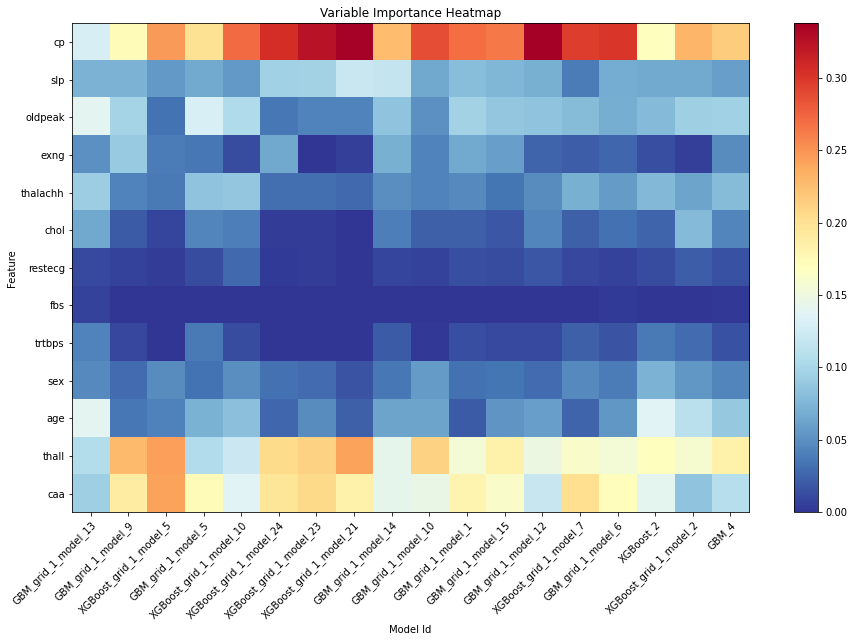

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

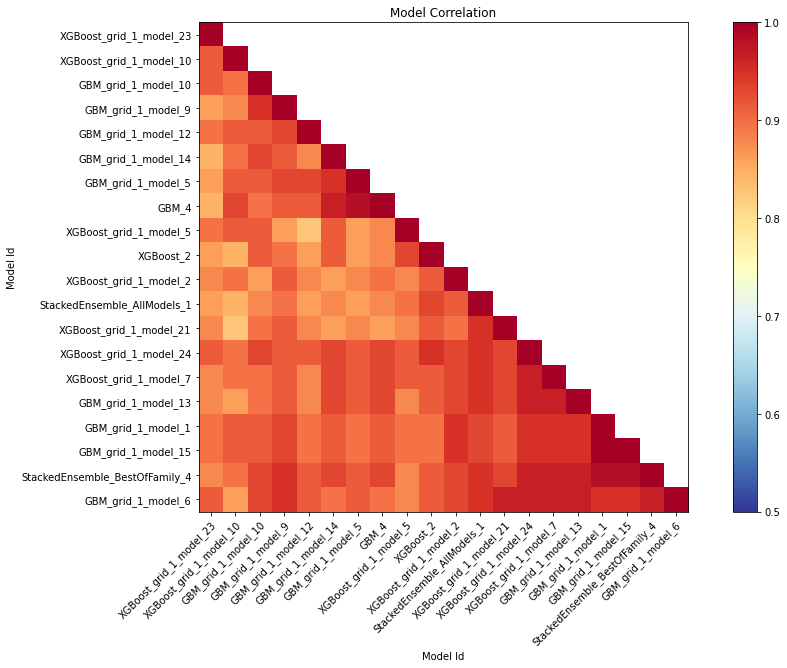

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

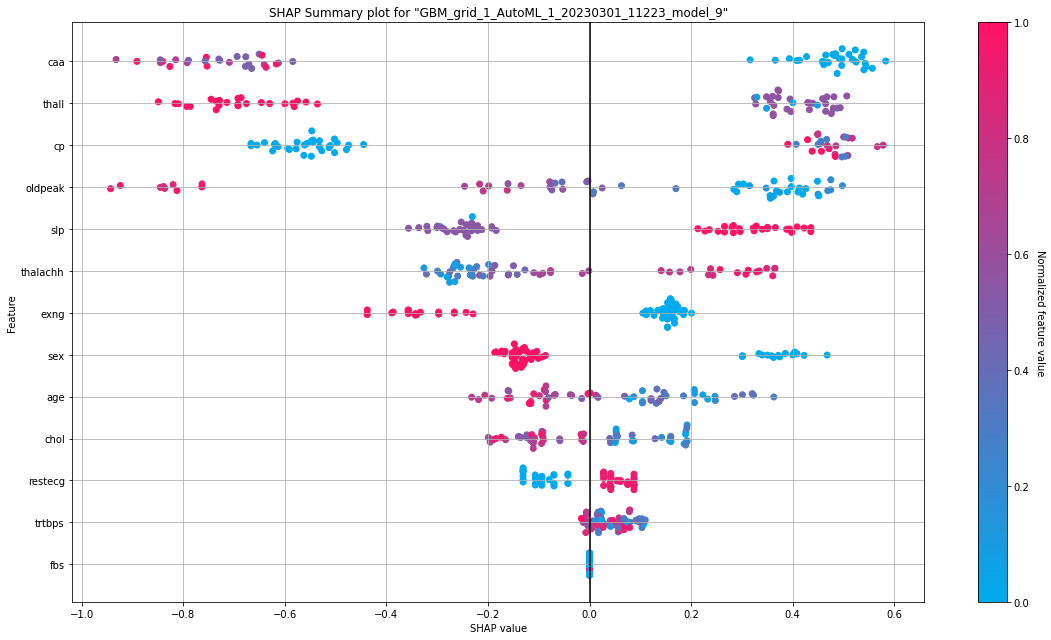

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

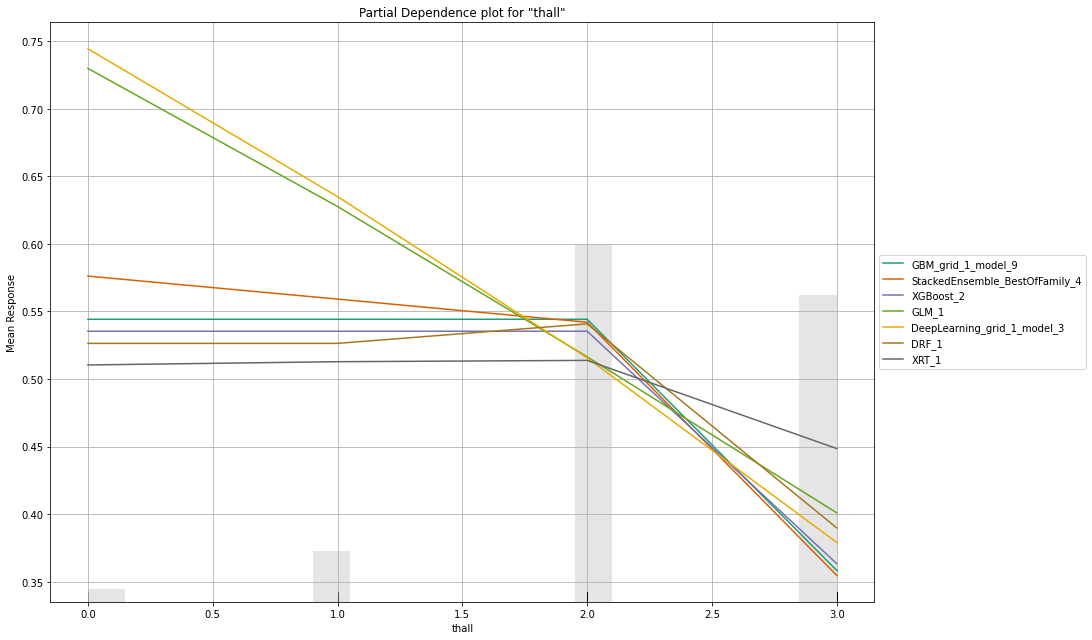

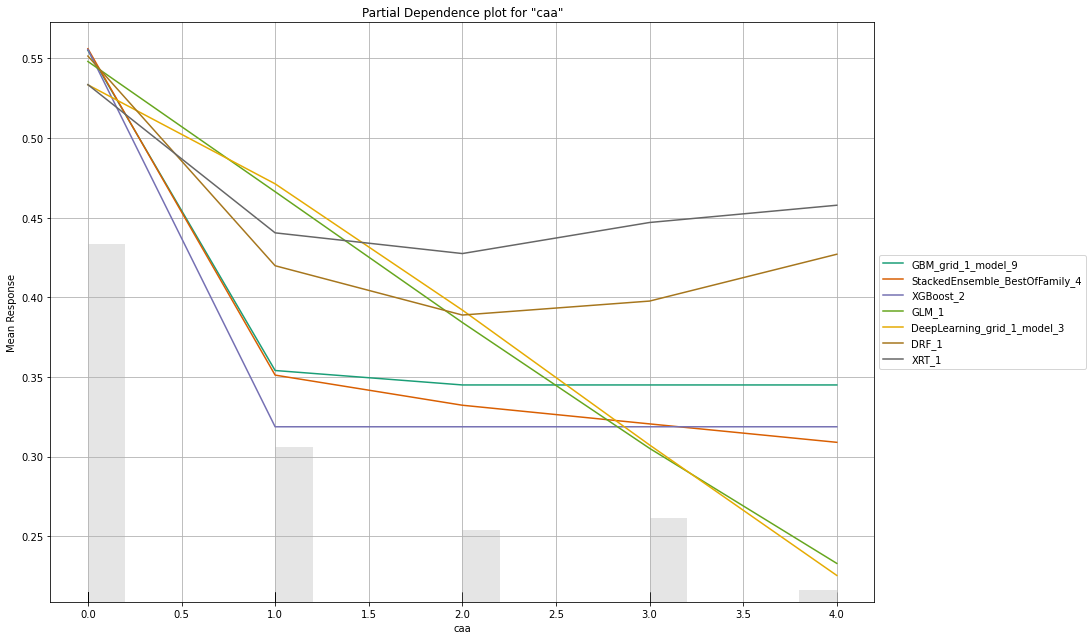

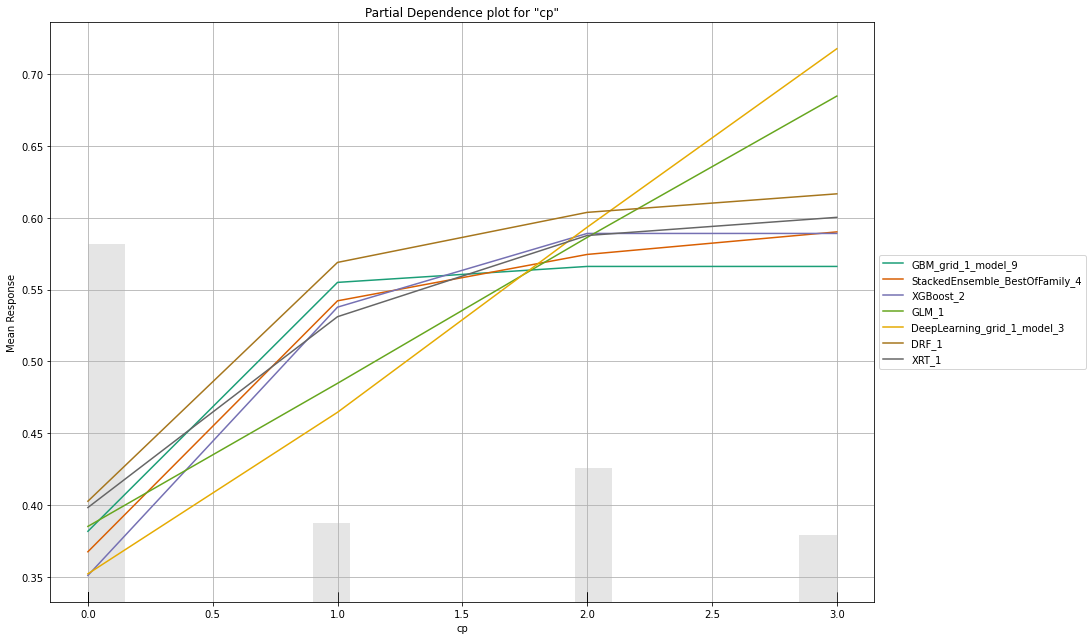

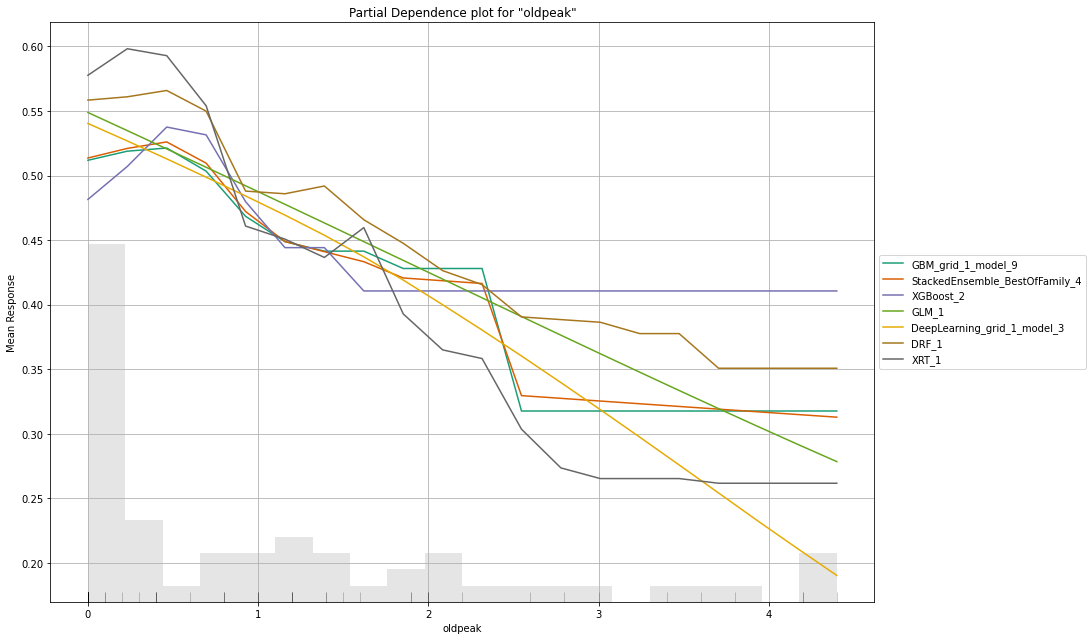

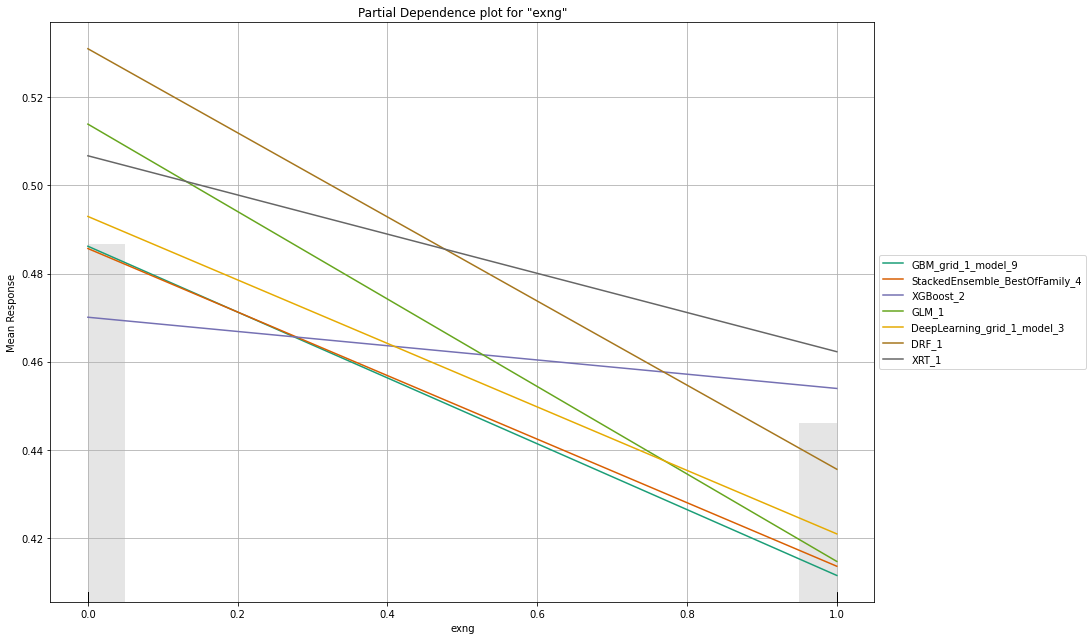

In [ ]:
exa= aml.explain(test)

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import h2o

pandas_df = h2o.as_list(data)

In [ ]:
results = smf.ols("output ~ age + sex + cp + trtbps + chol + fbs + restecg +thalachh + exng + oldpeak + slp + caa + thall",
data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.49e-38
Time:                        01:19:58   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trtbps        -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalachh       0.0030      0.001      2.671      0.008       0.001       0.005
exng          -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slp            0.0790      0.042      1.863      0.063      -0.004       0.162
caa           -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thall         -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=316), [int(0.6 * len(data)), int(0.8 * len(data))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
from h2o.grid.grid_search import H2OGridSearch


In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:


gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:
gbm_grid2.train(
    x=predictor, y=response, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1480062
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.1491071
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.1516401
,0.5,0.02,2.0,0.9,gbm_grid2_model_35,0.1530735
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,0.1540304
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1553162
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1556439
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.1567162
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1567299
,0.8,0.04,2.0,0.9,gbm_grid2_model_4,0.1569349


In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.2,0.02,10.0,0.5,gbm_grid2_model_25,0.1480062
,0.1,0.02,9.0,0.8,gbm_grid2_model_16,0.1491071
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,0.1516401
,0.5,0.02,2.0,0.9,gbm_grid2_model_35,0.1530735
,0.5,0.03,2.0,0.6000000,gbm_grid2_model_26,0.1540304
,0.1,0.08,3.0,0.8,gbm_grid2_model_13,0.1553162
,0.2,0.04,5.0,0.9,gbm_grid2_model_29,0.1556439
,0.5,0.05,2.0,0.8,gbm_grid2_model_27,0.1567162
,0.9,0.03,10.0,0.5,gbm_grid2_model_21,0.1567299
,0.8,0.04,2.0,0.9,gbm_grid2_model_4,0.1569349


In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


In [ ]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.2        0.02         10          0.5           0.148006
1               0.1        0.02          9          0.8           0.149107
2               0.3        0.02          2          1.0           0.151640
3               0.5        0.02          2          0.9           0.153073
4               0.5        0.03          2          0.6           0.154030
5               0.1        0.08          3          0.8           0.155316
6               0.2        0.04          5          0.9           0.155644
7               0.5        0.05          2          0.8           0.156716
8               0.9        0.03         10          0.5           0.156730
9               0.8        0.04          2          0.9           0.156935
10              0.1        0.07          7          0.8           0.157331
11              0.8        0.03          5          0.5           0.158664
12              0.3      

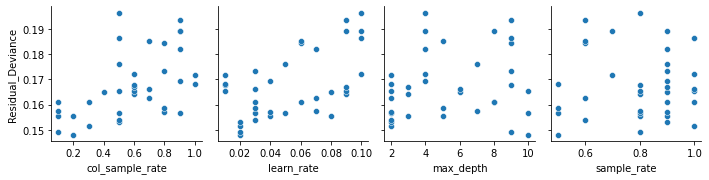

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400],'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

In [ ]:
y= dfpd['output']
X=dfpd.drop('output',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 242, dtype: int64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

mode = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]}

In [ ]:
random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,
                              n_iter=5, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(X_train, y_train)
random_rf.best_estimator_.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
random_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 1100}

In [ ]:
data.columns

(exclude insignificant ones and built the model)<br/>


**Key Question/Answers**

1.   Is the relationship significant?

      The above Variable Importance Graph is based on H2o's Gradient Boosting Machine. Key Takeaways:<br/><br/>

      "cp" Chest pain type is the most important variable of all.<br/>
      "caa" is very close to "cp" with an importance of 0.85

2.   Are any model assumptions violated?<br/>
      Since our output is a binary variable, this is treated as a classification problem and not a regression problem. So applying a linear regression algorithm wouldn't necessarily give us the best results. But even in case if we applied a linear model, most of the assumptions would not stand true. <br/>
    (1)There needs to be linear relation between the independent and dependent variable. 
    This assumption is violated since fitting the regression line wouldn't justify the output i.e step function

  (2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.
     This assumption is violated since the plot between the residuals i.e target and independent variable do not follow normal distribution

  (3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.
    This assumption is violated since there is multicollinearity between the variables 
  (4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.
   As we have seen that the Durbin-Watson test value is 1.03 which says that there is autocorrelation between variables



3.   Is there any multicollinearity in the model?
    From the VIF calculation, we can conclude that there is multicollinearity between the variables 

4.   In the multivariate models are predictor variables independent of all the other predictor variables?
    Heatmap indicates that, the following sets of variables [thlachh, age], [exng, cp], [oldpeak,slp] are correlated.

5.   In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. (exclude insignificant ones and built the model)
    Most significant variables : thalachh, cp
    Insignificnat variables : age, sex

6.   Does the model make sense?
    Overall the model does makes sense. Because the AUC is pretty good(i.e 0.923). We can probably improve the AUC to a little extent by dropping the least important variables.

7.   Does regularization help?<br/>
    Regularization is a process of adding penalty to our objective function. This is generally done to avoid overfitting in a model. After we regularise our model, the algorithm significantly avoids capturing additional noise. 
    For our data, we compared all 3 different iterations : Lasso Regression, Ridge Regression, Non-regularised 
    Lasso regression improved the AUC when compared to others
8.   Which independent variables are significant?
    thall, caa, cp are the most significant
    sex, thalachh are the least significant




